In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("./bank.csv")

In [2]:
data.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
columnas_a_usar= ["age", "balance", "day", "duration", #numericas
                  "job", "marital", "education", "contact", #categoricas
                  "deposit"] #variable a predecir

data_actualizado = data[columnas_a_usar]

#convertir la columna a predecir en binaria (numerica) 
data_actualizado['deposit'] = data_actualizado['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

data[columnas_a_usar].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   balance    11162 non-null  int64 
 2   day        11162 non-null  int64 
 3   duration   11162 non-null  int64 
 4   job        11162 non-null  object
 5   marital    11162 non-null  object
 6   education  11162 non-null  object
 7   contact    11162 non-null  object
 8   deposit    11162 non-null  object
dtypes: int64(4), object(5)
memory usage: 785.0+ KB


C:\Users\User\AppData\Local\Temp\ipykernel_1984\4207855164.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_actualizado['deposit'] = data_actualizado['deposit'].apply(lambda x: 1 if x == 'yes' else 0)


In [5]:
data_actualizado

,age,balance,day,duration,job,marital,education,contact,deposit
0,59,2343,5,1042,admin.,married,secondary,unknown,1
1,56,45,5,1467,admin.,married,secondary,unknown,1
2,41,1270,5,1389,technician,married,secondary,unknown,1
3,55,2476,5,579,services,married,secondary,unknown,1
4,54,184,5,673,admin.,married,tertiary,unknown,1
...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,blue-collar,single,primary,cellular,0
11158,39,733,16,83,services,married,secondary,unknown,0
11159,32,29,19,156,technician,single,secondary,cellular,0
11160,43,0,8,9,technician,married,secondary,cellular,0


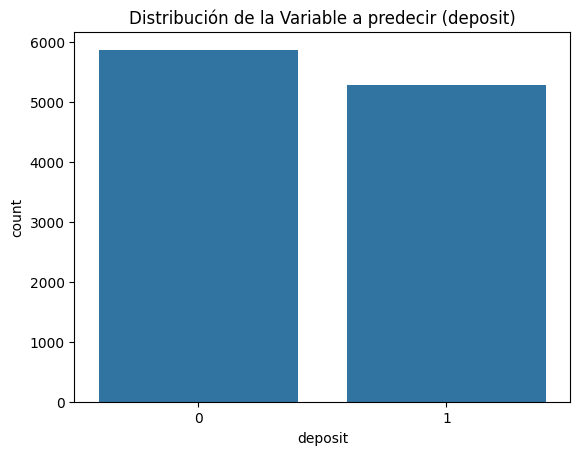

In [6]:
# Distribución de las variables numéricas
data_actualizado[["age", "balance", "day", "duration"]].describe()

# Distribución de la variable deposit
sns.countplot(x='deposit', data=data_actualizado)
plt.title("Distribución de la Variable a predecir (deposit)")
plt.show()



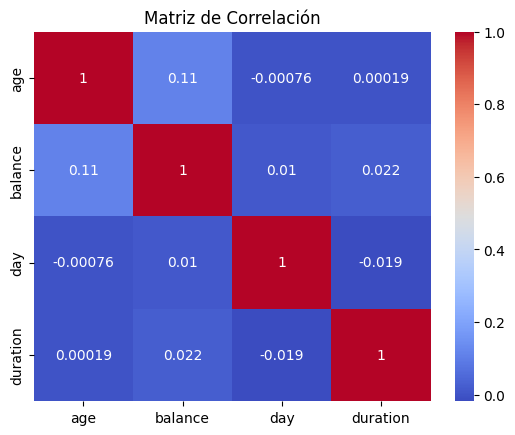

In [21]:
# Matriz de correlación de las variables numéricas 
matriz_de_correlacion = data_actualizado[["age", "balance", "day", "duration"]].corr() 
sns.heatmap(matriz_de_correlacion, annot=True, cmap='coolwarm') 
plt.title("Matriz de Correlación") 
plt.show()

# ONE HOT ENCODING

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Convertir variables categóricas a columnas  
data_dummies = pd.get_dummies(data_actualizado, drop_first=True)


X = data_actualizado.drop('deposit', axis=1)
y = data_actualizado['deposit']



In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#entrenar el modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#predicciones
y_pred = model.predict(X_test)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
# Calcular y mostrar la accuracy
accuracy = accuracy_score(y_test, y_pred)
print("accuracy: ", accuracy)
print("confusion de matrices" , conf_matrix)

accuracy:  0.7608241266049567
confusion de matrices [[1441  301]
 [ 500 1107]]


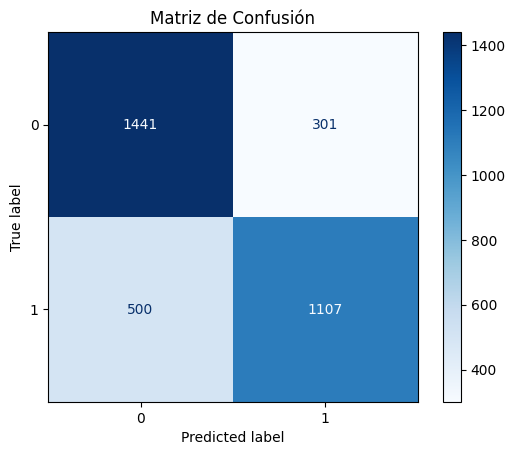

In [40]:
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot(cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()


1441 verdaderos negativos    -----------------            301 falsos negativos

500 falsos positivos        -------------------------             1107 verdaderos positivos

                Feature  Coefficient
11          job_student     0.871240
8           job_retired     0.606767
18   education_tertiary     0.588889
19    education_unknown     0.419107
17  education_secondary     0.203553
16       marital_single     0.186950
14          job_unknown     0.032117
3              duration     0.004869
0                   age     0.004495
1               balance     0.000035
2                   day    -0.014045
13       job_unemployed    -0.080024
20    contact_telephone    -0.166530
15      marital_married    -0.173808
12       job_technician    -0.179556
6         job_housemaid    -0.266973
7        job_management    -0.276226
9     job_self-employed    -0.444628
10         job_services    -0.478332
4       job_blue-collar    -0.587483
5      job_entrepreneur    -0.837113
21      contact_unknown    -1.694752


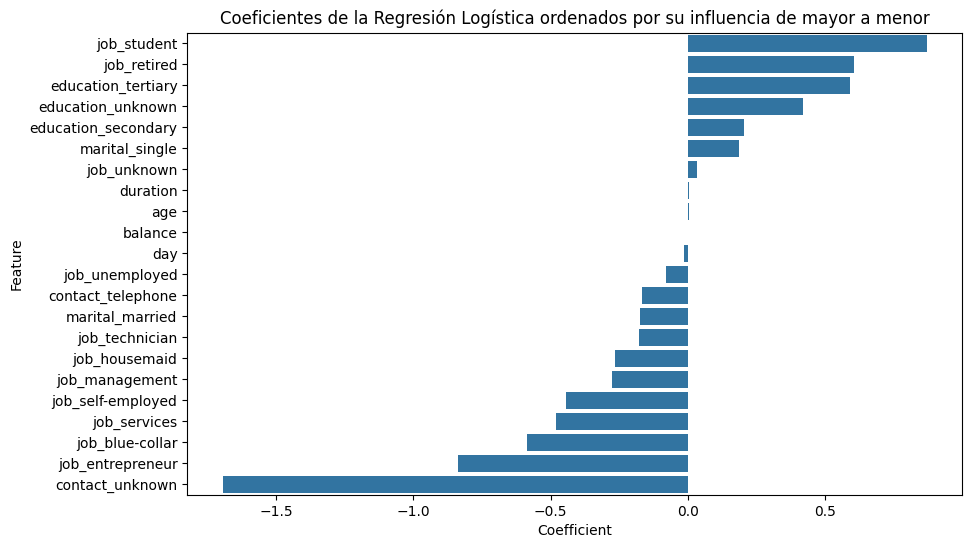

In [47]:
# Obtener los coeficientes
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

print(coefficients)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title("Coeficientes de la Regresión Logística ordenados por su influencia de mayor a menor")
plt.show()